In [1]:
import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from YbOH_Energy_Levels_symbolic import YbOHLevels
np.set_printoptions(precision=5, suppress=True)

This notebook computes the energy levels for YbOH isotopologues in E and B fields

First, we construct the Hamiltonian as a class carrying a symbolic function. Using this function, the Hamiltonian can be evaluated at different values of E and B. The symbolic function is assembled once, reducing the burden for large matrices.

The class initialization arguments are: isotope, state, N_range, M_values, I, S, round

isotope = string denoting Yb isotope (ie '174')\
state = string denoting vibronic state (ie 'X010')\
N_range = tuple denoting (Nmin,Nmax)\
M_values = options are 'all', 'pos', 'none'. Default is 'all'
I = Array of nuclear spins, $[I_Yb, I_H]$. Default is $[0,1/2]$.
S = Electronic spin. Default is 1/2
round = how many digits after decimal to round results 

In [6]:
N_list = [i for i in range(2)]
print(N_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [7]:
X010_174= YbOHLevels.initialize_state('174','X000',N_list,M_values = 'none',I=[0,1/2],S=1/2,round=4)

Cannot construct decoupled basis without M values


The above object is an instance of the YbOHLevels class. It contains the Hamiltonian for the $\tilde{X}^2 \Sigma (010)$ state of $^{174}$YbOH, for $N=1$ only, in the $b_{\beta J}$ basis.

In [10]:
for key in X010_174.__dict__.keys(): print(key)

iso_state
isotope
state
N_range
M_values
round
e_spin
I_spins
library
parameters
matrix_elements
hunds_case
q_numbers
q_str
alt_q_numbers
H_function
H_symbolic
evals0
evecs0
E0
B0
Ez
_Bz
evals_E
evecs_E
Bz
_Ez
evals_B
evecs_B
H_PTV
PTV_E
PTV0
PTV_type


These are the attributes of the YbOHLevels class. They contain information about the state, constants, matrix elements as functions, as well as other information the instance was initialized with.

Library is a class that contains all YbOH information and matrix elements, not just those for this particular state. This is useful for basis conversions, etc.

q_numbers is a dictionary containing the good quantum numbers of each basis vector. In this case, the basis vector is $|\Lambda;N,S,J,I,F,M\rangle$. Each dict item in q_numbers corresponds to one of the operators characterizing the basis and all its possible quantum numbers (ie eigenvalues). The ith basis vector is characterized by the ith index of each entry in q_numbers.
q_str is just the keys of q_numbers in a list.\

In [11]:
i=0
print('Basis vector',i)
for q, q_value in X010_174.q_numbers.items():
    print(q,'=',q_value[i])

Basis vector 0
L = -1
N = 1
J = 0.5
F = 0.0
M = 0.0


The Hamiltonian is stored in two forms: as a function, and as a symbolic object. The function form takes as an argument the values of two fields: an electric field $E_z$ and magnetic field $B_z$. It returns a numpy matrix of the Hamiltonian at those field values. This is the form you want to diagonalize. \
The symbolic form is a sympy object. It is not useful for diagonalization, but can be useful for visualizing the Hamiltonian.\
H_builder is the function used to construct the Hamiltonian.

In [12]:
print(X010_174.H_function(0,0)[:4,:4])

[[7431.16053   10.         0.         0.     ]
 [  10.      7431.16053    0.         0.     ]
 [   0.         0.      7429.01386   10.     ]
 [   0.         0.        10.      7429.01386]]


In [13]:
sy.N(X010_174.H_symbolic[:4,:4],2)

Matrix([
[7.4e+3,   10.0,                          0,                          0],
[  10.0, 7.4e+3,                          0,                          0],
[     0,      0, 0.47*Bz - 0.32*Ez + 7.4e+3,                       10.0],
[     0,      0,                       10.0, 0.47*Bz + 0.32*Ez + 7.4e+3]])

evals0 and evecs0 contain the eigenvalues and eigenvectors associated with the most recent diagonalization.
To diagonalize the matrix at a particular value of $E$ and $B$, use the eigensystem method. The order keyword arg will order the output eigenvalues from low to high. The method keyword arg controls the backend used for diagonalization, default is numpy LA.eig().

In [14]:
evals, evecs = X010_174.eigensystem(0,0.001,order=True,method='numpy')

Once the instance has eigenvalues and eigenvectors, you can use the write_state() method to visualize a given element in the eigenbasis.

In [15]:
X010_174.write_state(1)

E = 7295.719141704224 MHz

 0.012399931304380576 |Λ=-1,N=1,J=0.5,F=1.0,M=0.0> 

 -0.012399931304380576 |Λ=1,N=1,J=0.5,F=1.0,M=0.0> 

 -0.7069960832416989 |Λ=-1,N=1,J=1.5,F=1.0,M=0.0> 

 0.7069960832416989 |Λ=1,N=1,J=1.5,F=1.0,M=0.0> 

 9.999944600306916e-05 |Λ=-1,N=1,J=1.5,F=2.0,M=0.0> 

 -9.999944600306916e-05 |Λ=1,N=1,J=1.5,F=2.0,M=0.0> 



We can also generate Stark and Zeeman shift plots.

In [1]:
Bz = np.linspace(0.001,100,3000)
Ez = np.linspace(0.0,1000,3000)

NameError: name 'np' is not defined

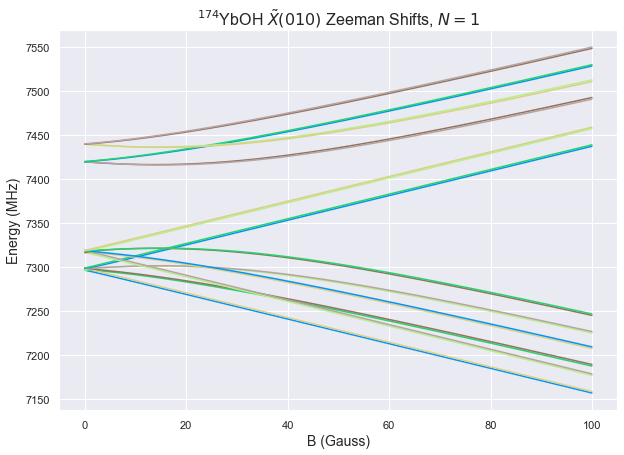

In [10]:
X010_174.ZeemanMap(Bz,0,plot=True)

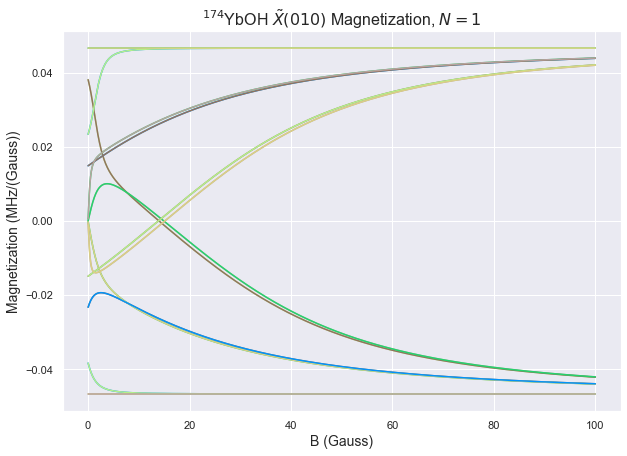

In [11]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T):
    grad = np.gradient(trace)
    plt.plot(Bz,grad)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (MHz/(Gauss))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Magnetization, $N=1$',fontsize=16);

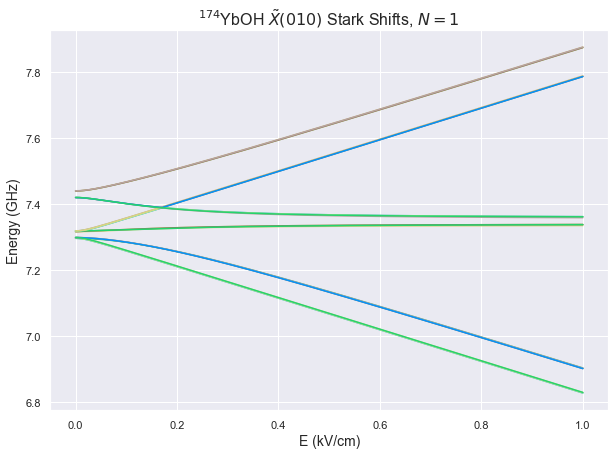

In [12]:
X010_174.StarkMap(Ez,0.01,plot=False)
X010_174.plot_evals_EB('E',kV_kG=True,GHz=True)

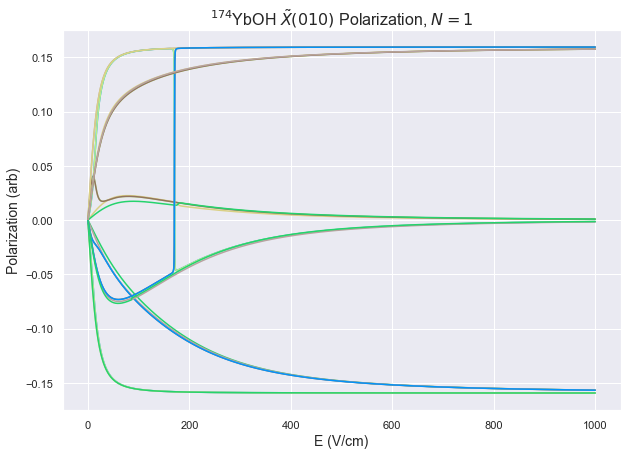

In [13]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_E.T):
    grad = np.gradient(trace)
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

We can display a plot of the energy levels at arbitray field. (The code does not handle parity labeling well, so I am leaving out L for zero field.)

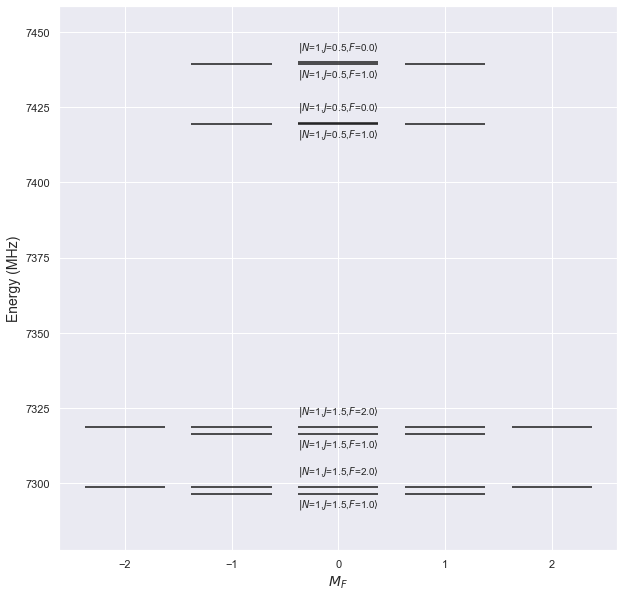

In [14]:
X010_174.display_levels(0,0.001,'F',label_q=[q for q in X010_174.q_str if q!='L'])

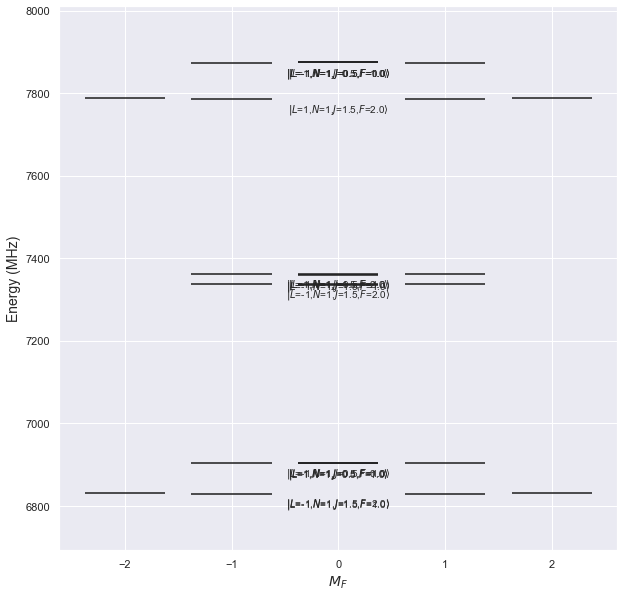

In [15]:
X010_174.display_levels(1000,0.001,'F')

We can also look at PT violating shifts. Here, we consider the EDM shifts as a function of E field. 

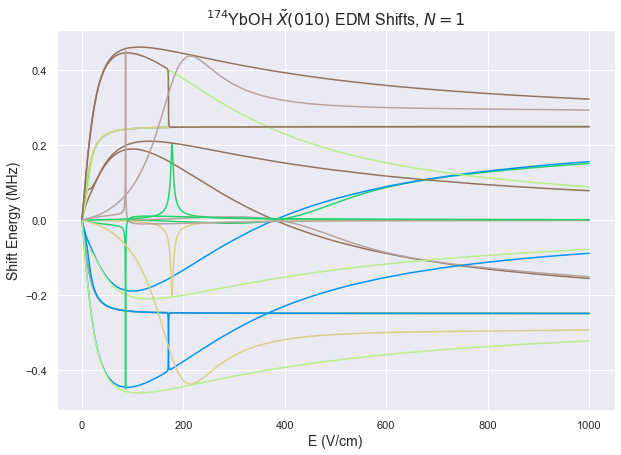

In [17]:
X010_174.PTV_Map('EDM',plot=True)

We can look specifically at the upper and lower Stark manifolds at a given field value too.

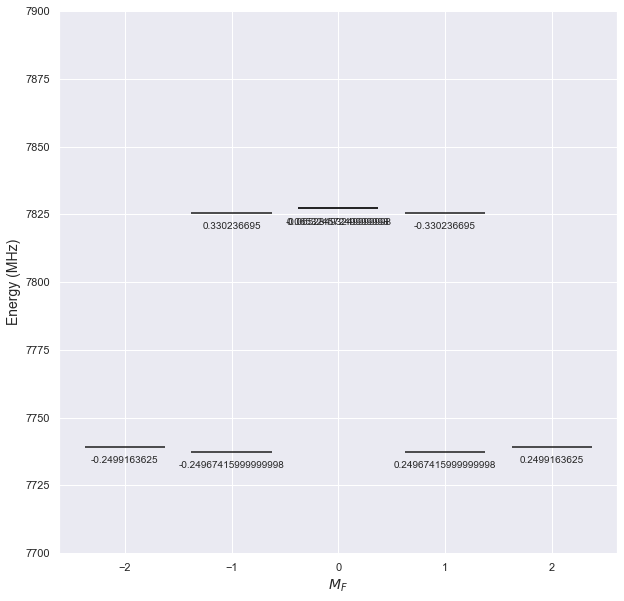

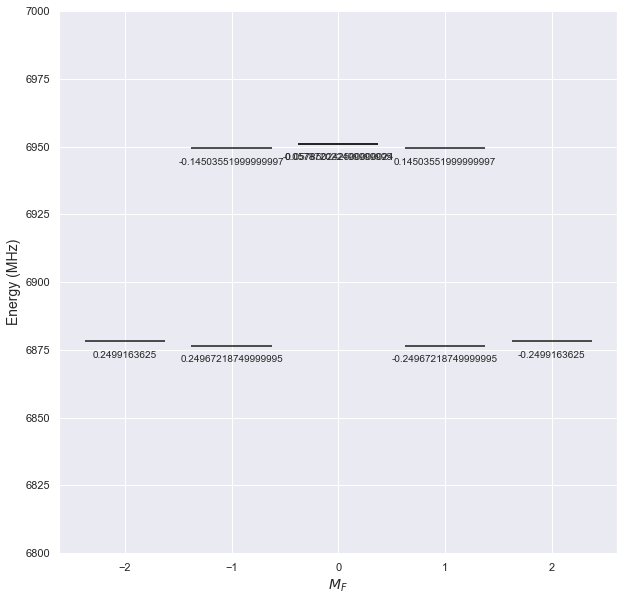

In [10]:
X010_174.display_PTV(900,0.001,'EDM',ylim=(7700,7900))
X010_174.display_PTV(900,0.001,'EDM',ylim=(6800,7000))

In [6]:
X010_174.write_state(-3,900,0.001)

E = 7825.654169862816 MHz

EDM Shift = 0.330236695

 -0.0118 |Λ=-1,N=1,J=0.5,F=1.0,M=-1.0> 

 0.8796 |Λ=1,N=1,J=0.5,F=1.0,M=-1.0> 

 0.0016 |Λ=-1,N=1,J=1.5,F=1.0,M=-1.0> 

 -0.2195 |Λ=1,N=1,J=1.5,F=1.0,M=-1.0> 

 0.0032 |Λ=-1,N=1,J=1.5,F=2.0,M=-1.0> 

 -0.4219 |Λ=1,N=1,J=1.5,F=2.0,M=-1.0> 



In [7]:
X010_173= YbOHLevels.initialize_state('173','X010',[1],all_M=True)

In [8]:
Bz = np.linspace(0.001,5000,3000)
Ez = np.linspace(0.0,10000,3000)

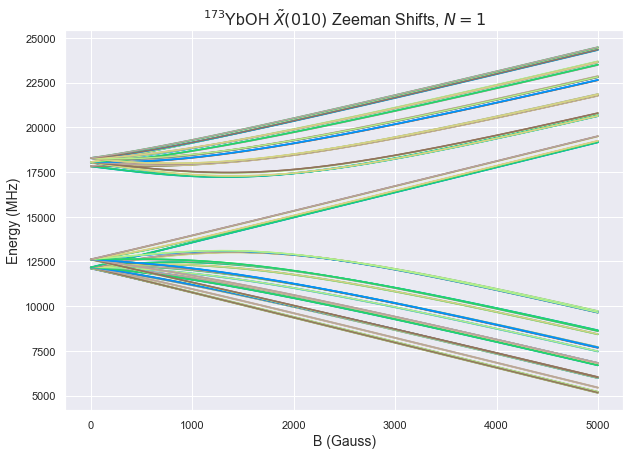

In [9]:
X010_173.ZeemanMap(Bz,0,plot=True)

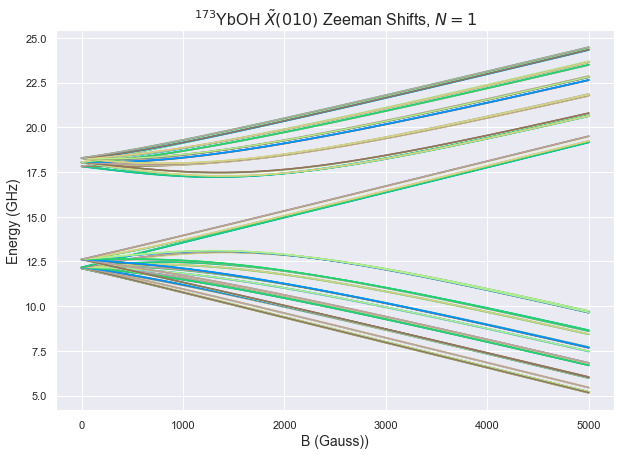

In [5]:
plt.figure(figsize=(10,7))
for trace in evals173_B.T:
    plt.plot(Bz,trace*10**-3)
plt.xlabel('B (Gauss))',fontsize=14)
plt.ylabel('Energy (GHz)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Zeeman Shifts, $N=1$',fontsize=16);

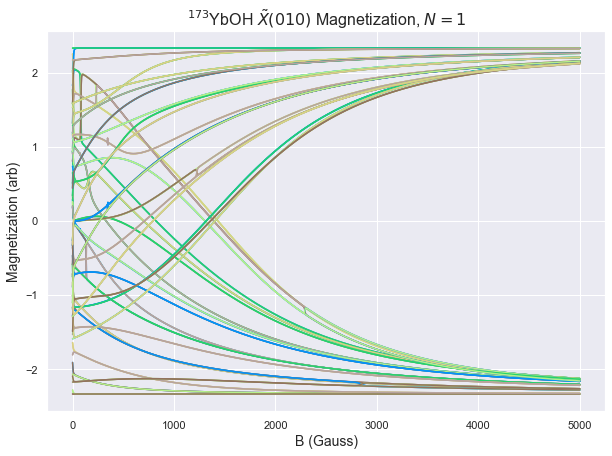

In [6]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(evals173_B.T):
    grad = np.gradient(trace)
    plt.plot(Bz,grad)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (arb)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Magnetization, $N=1$',fontsize=16);

In [18]:
evals173_E,evecs173_E = X010_173.StarkMap(Ez,0.1)

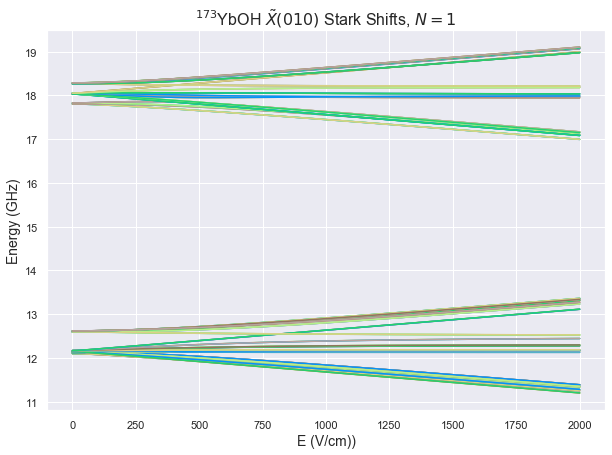

In [13]:
plt.figure(figsize=(10,7))
for trace in evals173_E.T:
    plt.plot(Ez,trace*10**-3)
plt.xlabel('E (V/cm))',fontsize=14)
plt.ylabel('Energy (GHz)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

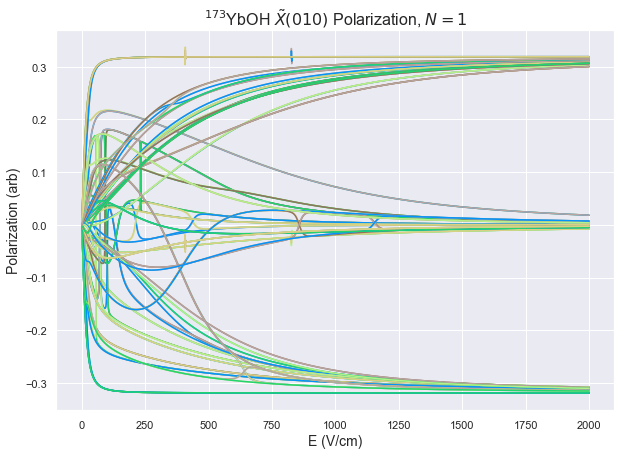

In [9]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(evals173_E.T):
    grad = np.gradient(trace)
    grad[0]=0
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (arb)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

In [19]:
MQM_vs_E_1,HMQM_1 = X010_173.PTV_Map(evecs173_E,EDM=0,MQM=1,H_MQM=1)
MQM_vs_E_2, HMQM_2 = X010_173.PTV_Map(evecs173_E,EDM=0,MQM=1,H_MQM=2)

In [11]:
H1 = HMQM_1/HMQM_1.max()
H2 = HMQM_2/HMQM_2.max()

In [12]:
Htot = H1-H2

In [13]:
H2

array([[ 0.55244,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     , -0.55244,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.55244, ...,  0.     ,  0.     ,  0.     ],
       ...,
       [ 0.     ,  0.     ,  0.     , ..., -0.1973 ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.1973 ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     , -0.1973 ]])

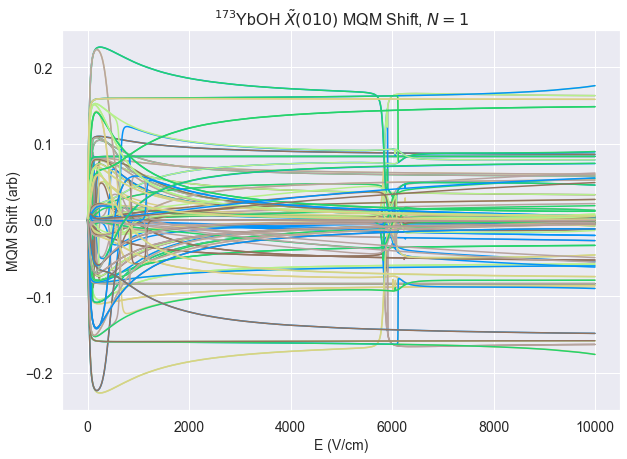

In [20]:
plt.figure(figsize=(10,7))
for trace in MQM_vs_E_1:
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('MQM Shift (arb)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ MQM Shift, $N=1$',fontsize=16);

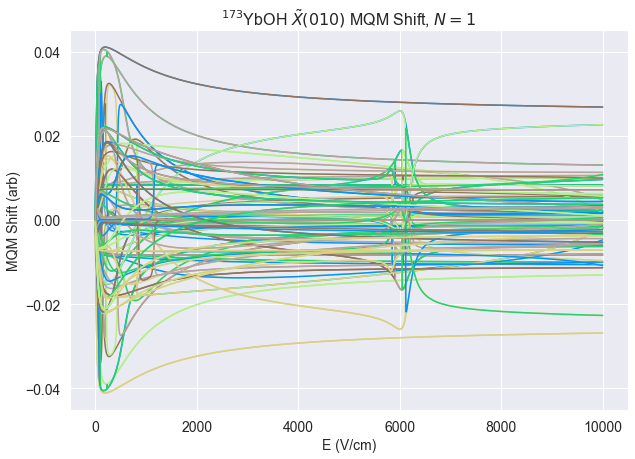

In [21]:
plt.figure(figsize=(10,7))
for trace in MQM_vs_E_2:
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('MQM Shift (arb)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ MQM Shift, $N=1$',fontsize=16);

In [22]:
sum([q+5 for q in [-1,1]])

10

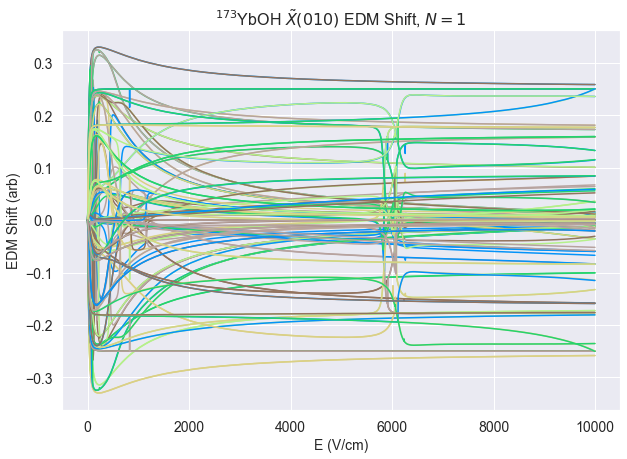

In [24]:
EDM_vs_E, HMQM_3 = X010_173.PTV_Map(evecs173_E,EDM=1,MQM=0,H_MQM=2)
plt.figure(figsize=(10,7))
for trace in EDM_vs_E:
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM Shift (arb)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ EDM Shift, $N=1$',fontsize=16);

In [20]:
np.searchsorted(Ez,1000)

300

In [23]:
X010_173.eigensystem(1000,1);

for i in range(len(MQM_vs_E_2[:,300])):
    shift = MQM_vs_E_2[:,300][i]
    print('Shift=',shift)
    if abs(shift)>0.5:
        print(i)
        X010_173.write_state(i)

Shift= 0.8586463558714778
0
E = 11676.827686417475 MHz

 0.0005 |Λ=-1,N=1,G=2.0,F1=3.0,F=3.5,M=-3.5> 

 0.0044 |Λ=-1,N=1,G=3.0,F1=3.0,F=3.5,M=-3.5> 

 -0.9475 |Λ=-1,N=1,G=3.0,F1=4.0,F=3.5,M=-3.5> 

 -0.0099 |Λ=1,N=1,G=3.0,F1=4.0,F=3.5,M=-3.5> 

 0.3196 |Λ=-1,N=1,G=3.0,F1=4.0,F=4.5,M=-3.5> 

 0.0033 |Λ=1,N=1,G=3.0,F1=4.0,F=4.5,M=-3.5> 

Shift= 0.6427432763280478
1
E = 11679.270744319288 MHz

 0.9999 |Λ=-1,N=1,G=3.0,F1=4.0,F=4.5,M=-4.5> 

 0.0105 |Λ=1,N=1,G=3.0,F1=4.0,F=4.5,M=-4.5> 

Shift= -0.6425590022066462
2
E = 11679.630032458248 MHz

 0.0005 |Λ=1,N=1,G=2.0,F1=3.0,F=3.5,M=3.5> 

 0.0044 |Λ=1,N=1,G=3.0,F1=3.0,F=3.5,M=3.5> 

 -0.0099 |Λ=-1,N=1,G=3.0,F1=4.0,F=3.5,M=3.5> 

 -0.9475 |Λ=1,N=1,G=3.0,F1=4.0,F=3.5,M=3.5> 

 -0.0033 |Λ=-1,N=1,G=3.0,F1=4.0,F=4.5,M=3.5> 

 -0.3195 |Λ=1,N=1,G=3.0,F1=4.0,F=4.5,M=3.5> 

Shift= -0.8586453012322033
3
E = 11682.073212443624 MHz

 0.0105 |Λ=-1,N=1,G=3.0,F1=4.0,F=4.5,M=4.5> 

 0.9999 |Λ=1,N=1,G=3.0,F1=4.0,F=4.5,M=4.5> 

Shift= 0.8589285373095628
4
E = 

In [143]:
X010_173.eigensystem(1000,1)
X010_173.write_state(112)
X010_173.write_state(113)

E = 18076.77405673899 MHz

 -0.3896 |Λ=-1,N=1,G=2.0,F1=1.0,F=1.5,M=1.5> 

 0.3763 |Λ=1,N=1,G=2.0,F1=1.0,F=1.5,M=1.5> 

 0.1369 |Λ=-1,N=1,G=2.0,F1=2.0,F=1.5,M=1.5> 

 -0.0867 |Λ=1,N=1,G=2.0,F1=2.0,F=1.5,M=1.5> 

 -0.339 |Λ=-1,N=1,G=2.0,F1=2.0,F=2.5,M=1.5> 

 0.1913 |Λ=1,N=1,G=2.0,F1=2.0,F=2.5,M=1.5> 

 -0.2834 |Λ=-1,N=1,G=2.0,F1=3.0,F=2.5,M=1.5> 

 0.2414 |Λ=1,N=1,G=2.0,F1=3.0,F=2.5,M=1.5> 

 0.486 |Λ=-1,N=1,G=2.0,F1=3.0,F=3.5,M=1.5> 

 -0.3924 |Λ=1,N=1,G=2.0,F1=3.0,F=3.5,M=1.5> 

 -0.0018 |Λ=-1,N=1,G=3.0,F1=2.0,F=1.5,M=1.5> 

 0.0014 |Λ=1,N=1,G=3.0,F1=2.0,F=1.5,M=1.5> 

 0.004 |Λ=-1,N=1,G=3.0,F1=2.0,F=2.5,M=1.5> 

 -0.0028 |Λ=1,N=1,G=3.0,F1=2.0,F=2.5,M=1.5> 

 0.002 |Λ=-1,N=1,G=3.0,F1=3.0,F=2.5,M=1.5> 

 -0.0019 |Λ=1,N=1,G=3.0,F1=3.0,F=2.5,M=1.5> 

 -0.0038 |Λ=-1,N=1,G=3.0,F1=3.0,F=3.5,M=1.5> 

 0.0034 |Λ=1,N=1,G=3.0,F1=3.0,F=3.5,M=1.5> 

 0.0004 |Λ=-1,N=1,G=3.0,F1=4.0,F=3.5,M=1.5> 

 -0.0001 |Λ=1,N=1,G=3.0,F1=4.0,F=3.5,M=1.5> 

 -0.0003 |Λ=-1,N=1,G=3.0,F1=4.0,F=4.5,M=1.5> 

 -0.0001 |

In [103]:
def plot_levels_freefield(evals, evecs, qnumbers,width=0.75,label=False,figsize=(10,10),ylim=None):
    scale = abs(evals[-1]-evals[0])
    if ylim==None:
        ylim = (evals[0]-0.1*scale,evals[-1]+0.1*scale)
    M_list = []
    N_list = []
    F1_list = []
    G_list = []
    M_bounds = []
    fig = plt.figure(figsize=figsize)
    plt.ylim(ylim)
    for evec in evecs:
        N= qnumbers['N'][np.argmax(evec**2)]
        G = qnumbers['G'][np.argmax(evec**2)]
        M = qnumbers['M'][np.argmax(evec**2)]
        F1 = qnumbers['F1'][np.argmax(evec**2)]
        N_list.append(N)
        G_list.append(G)
        M_list.append(M)
        F1_list.append(F1)
        M_bounds.append([(M-width/2),(M+width/2)])
    M_bounds = np.array(M_bounds).T
    plt.hlines(evals,*M_bounds)
#     left,right = plt.xlim()
#     plt.xlim(left-1,right+2)
    if label:
        sign = 1
        prevG = -1
        prevN=-1
        prevF1 = -1
        prev_energy = 0
        for i,(F1,G,N) in enumerate(zip(F1_list,G_list,N_list)):
            diff = abs(abs(evals[i])-abs(prev_energy))
            if G!=prevG:
                eigen_G = evals[i]
            if F1!=prevF1 and diff>5:
                plt.annotate(r'$|$$F_1$={},$N$={},$G$={}$\rangle$'.format(F1_list[i],N_list[i],G_list[i]),(0,evals[i]-0.03*scale),ha='center',fontsize=10)
                sign*=-1
            prevN = N
            prev_energy = evals[i]
            prevG = G
        bot,top = plt.ylim()
        plt.ylim(bot-0.3,top+0.3)
    plt.xlabel(r'$M_F$',fontsize=14)
    plt.ylabel('Energy (MHz)',fontsize=14)

In [1]:
x = [1,2,3,4]
y = x.remove(3)

In [2]:
x

[1, 2, 4]

In [104]:
plot_levels_freefield(evals0[70:],evecs0[70:],X000_173.qnumbers,label=True)

NameError: name 'evals0' is not defined

In [107]:
from matrix_elements import *

In [ ]:

for N in range(1,6):

In [432]:
class QState:
    def __init__(self,basis,case_str,vector):
        self.basis = basis
        self.size = len(basis['M'])
        self.case = case_str
        self.vector = vector
        
    def __str__(self):
        nonzero = np.nonzero(self.vector)[0]
        total_str = 'Case {}\n'.format(self.case)
        for i,index in enumerate(nonzero):
            state = self.lookup_index(index)
            if i==0:
                state_str = '{} * |'.format(self.vector[index])
            else:
                state_str = ' + \n{} * |'.format(self.vector[index])
            for j,qnumber in enumerate(state):
                if j==0:
                    state_str+=str(qnumber)+'={}'.format(state[qnumber])
                else:
                    state_str+=', '+str(qnumber)+'={}'.format(state[qnumber])
            state_str+='>'
            total_str+=state_str
        return total_str

    def lookup_index(self,index):
        state = {}
        for q in self.basis:
            state[q] = self.basis[q][index]
        return state

In [111]:
test = QState(X000_173.qnumbers,'bBS',evecs0[0])
print(test.__str__())

Case bBS
-0.0004 * |L=0, N=0, G=2.0, F1=2.0, F=2.5, M=2.5> + 
1.0 * |L=0, N=0, G=3.0, F1=3.0, F=2.5, M=2.5> + 
0.0001 * |L=0, N=1, G=3.0, F1=2.0, F=2.5, M=2.5> + 
-0.0003 * |L=0, N=1, G=3.0, F1=3.0, F=2.5, M=2.5> + 
0.0002 * |L=0, N=1, G=3.0, F1=4.0, F=3.5, M=2.5>


In [2]:
class YbOHLevels(object):
    def __init__(self,isotope,state,N_range):
        self.isotope = isotope
        if self.isotope =='174':
            self.I = 0
        elif self.isotope =='173':
            self.I = 5/2
        self.state = state
        self.N_range = N_range
        self.qnumbers = self.construct_qnumbers(return_size=True)
        self.q_str = self.qnumbers.keys()
        self.H = self.construct_Hamiltonian()
    
    def construct_qnumbers(self):
        if self.isotope == '174':
            if 'X000' in self.state:
                Lambda=0
                qnumbers = self.construct_bBJ(*self.N_range,Lambda=Lambda,I=self.I,S=1/2,M_values='all')
            elif 'A000' in self.state:
                Lambda=1
                qnumbers self.construct_aBJ(*self.N_range,Lambda=Lambda, I=self.I, S=1/2, M_values='all')
        elif self.isotope == '173':
            if 'X000' in self.state:
                Lambda=0
                qnumbers = self.construct_bBS(*self.N_range,Lambda=Lambda,I=self.I,S=1/2,M_values='all')
            elif 'A000' in self.state:
                Lambda=1
                qnumbers self.construct_aBJ(*self.N_range,Lambda=Lambda, I=self.I, S=1/2, M_values='all')
        return qnumbers
    
    def construct_bBJ(Nmin,Nmax,Lambda=0,S=1/2,I=1/2,M_values='all'):
        qnumbers_str = ['L','N','J','F','M']
        qnumbers = {}
        for q in qnumbers_str:
            qnumbers[q] = []
        if Lambda==0:
            for L in range(1):
                for N in np.arange(Nmin,Nmax+1,1):
                    for J in np.arange(abs(N-S),abs(N+S)+1,1):
                        for F in np.arange(abs(J-I),abs(J+I)+1,1):
                            if M_values == 'all':
                                Mmin = -F
                            else:
                                Mmin=0.0
                            for M in np.arange(Mmin,F+1,1):
                                values = [L,N,J,F,M]
                                for q,val in zip(qnumbers_str,values):
                                    qnumbers[q].append(val)
        return qnumbers
    
    def construct_hamiltonian(self):
        if self.isotope == '174':
            if 'X000' in self.state:
                self.construct_X000()
            elif 'A000' in self.state:
                Lambda=1
                qnumbers self.construct_aBJ(*self.N_range,Lambda=Lambda, I=self.I, S=1/2, M_values='all')
        elif self.isotope == '173':
            if 'X000' in self.state:
                Lambda=0
                qnumbers = self.construct_bBS(*self.N_range,Lambda=Lambda,I=self.I,S=1/2,M_values='all')
            elif 'A000' in self.state:
                Lambda=1
                qnumbers self.construct_aBJ(*self.N_range,Lambda=Lambda, I=self.I, S=1/2, M_values='all')

        
        
    def construct_X000(self):
        Ez,Bz = sy.symbols('Ez Bz')
        size = len(self.qnumbers[self.q_str[0]])
        H = np.zeros((size,size))
        Iz = np.zeros((size,size))
        Sz = np.zeros((size,size))
        for i in range(size):
            for j in range(size):
                state_out = [self.qnumbers[q][i] for q in self.q_str]
                state_in = [self.qnumbers[q][j] for q in self.q_str]
                H[i,j] = BeX*Rot_bBJ(*state_out,*state_in) + Gamma_SRX*SR_bBJ(*state_out,*state_in) + \
                    b00X*IS_bBJ(*state_out,*state_in) + \
                    g_S*mu_B/h*Bz*ZeemanZ_bBJ(*state_out,*state_in) - mu_EX/h*Ez*StarkZ_bBJ(*state_out,*state_in)
                Iz[i,j] = Iz_bBJ(*state_out,*state_in)
                Sz[i,j] = Sz_bBJ(*state_out,*state_in)
        H = H + c00X*(Iz@Sz)
        return H

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

In [188]:
Ex,Bx = sy.symbols('Ex Bx')

In [189]:
Ex*2

2*Ex

In [660]:
#174YbOH Constants in MHz
BeX = 7348.40053#/2000
Gamma_SRX = -81.150#/100
bF00X = 4.80#/10
c00X = 2.46#/10
b00X = bF00X - c00X/3
mu_EX= 1.9*2.082*10**-6 #Debye in eV/(kV/cm)
S = 0.5
I = 0.5
mu_B = 5.78838181*10**-9 #eV/Gauss
g_S = 2.0023
h = 4.136*10**-9 #eV/MHz

In [90]:
x = np.zeros((4,6))
x[2,:] = 1
x[:,1] = 1
print(x)

[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 0.]]


In [195]:
print(r'$\gamma$')

$\gamma$


In [133]:
print(x)
print(y)
print(x @ y)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]


In [9]:
True*True

1

In [11]:
def construct_bBJ(Nmin,Nmax,Lambda=0,S=1/2,I=1/2,M_values='all'):
    qnumbers_str = ['L','N','J','F','M']
    qnumbers = {}
    for q in qnumbers_str:
        qnumbers[q] = []
    if Lambda==0:
        for L in range(1):
            for N in np.arange(Nmin,Nmax+1,1):
                for J in np.arange(abs(N-S),abs(N+S)+1,1):
                    for F in np.arange(abs(J-I),abs(J+I)+1,1):
                        if M_values == 'all':
                            Mmin = -F
                        else:
                            Mmin=0.0
                        for M in np.arange(Mmin,F+1,1):
                            values = [L,N,J,F,M]
                            for q,val in zip(qnumbers_str,values):
                                qnumbers[q].append(val)
    return qnumbers


def Hamiltonian_bX(Ez, Bz, Nmin,Nmax,Lambda=0,S=1/2,I=1/2,M_values='all'):
    Ez, Bz = sy.symbols('Ez Bz')
    qnumbers=construct_bBJ(Nmin,Nmax,Lambda,S,I,M_values)
    HX = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    Iz = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    Sz = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    Zeeman = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    for i in range(len(Lambda_Xb)):
        for j in range(len(Lambda_Xb)):
            state_out = [Lambda_Xb[i], N_Xb[i], J_Xb[i], F_Xb[i], M_Xb[i]] #L0,N0, etc
            state_in = [Lambda_Xb[j], N_Xb[j], J_Xb[j], F_Xb[j], M_Xb[j]] #L1,N1, etc
            HX[i,j] = BeX*bRot(*state_out,*state_in) + Gamma_SRX*bSR(*state_out,*state_in) + \
                b00X*bIS(*state_out,*state_in) + \
                g_S*mu_B/h*Bz*bZeeman(*state_out,*state_in) - mu_EX/h*Ez*bStark(*state_out,*state_in)
            Iz[i,j] = bIz(*state_out,*state_in)
            Sz[i,j] = bSz(*state_out,*state_in)
    HX = HX + c00X*(Iz@Sz)
    qnumbers = [Lambda_Xb,N_Xb,J_Xb,F_Xb,M_Xb]
    return HX,[Lambda_Xb,N_Xb,J_Xb,F_Xb,M_Xb]

def kronecker(a,b):
    if a==b:
        return True
    else:
        return False
    
def Rot_bBJ(L0,N0,J0,F0,M0,L1,N1,J1,F1,M1):
    if not kronecker(L0,L1)*kronecker(N0,N1)*kronecker(F0,F1)*kronecker(M0,M1)*kronecker(J0,J1):
        return 0
    else:
        return N0*(N0+1)
    
def SR_bBJ(L0,N0,J0,F0,M0,L1,N1,J1,F1,M1):
    if not kronecker(L0,L1)*kronecker(J0,J1)*kronecker(N0,N1)*kronecker(F0,F1)*kronecker(M0,M1):
        return 0
    else:
        return (-1)**(N0+J0+S)*np.sqrt(S*(S+1)*(2*S+1)*N0*(N0+1)*(2*N0+1))*\
            wigner_6j(S,N0,J0,N0,S,1)

def IS_bBJ(L0,N0,J0,F0,M0,L1,N1,J1,F1,M1):
    if not kronecker(L0,L1)*kronecker(N0,N1)*kronecker(F0,F1)*kronecker(M0,M1):
        return 0
    else:
        return (-1)**(J1 + F0 + I + J0 + N0 + S + 1)*\
            np.sqrt((2*J1+1)*(2*J0+1)*S*(S+1)*(2*S+1)*I*(I+1)*(2*I+1))*\
            wigner_6j(I,J1,F0,J0,I,1)*wigner_6j(J0,S,N0,S,J1,1)
   

def Iz_bBJ(L0,N0,J0,F0,M0,L1,N1,J1,F1,M1):
    if not kronecker(F0,F1)*kronecker(M0,M1):
        return 0
    else:
        return (-1)**(I+F0+S-L0+1)*np.sqrt((2*J1+1)*(2*J0+1)*(2*N0+1)*(2*N1+1)*I*(I+1)*(2*I+1))*\
            wigner_6j(J1,I,F0,I,J0,1)*wigner_6j(N1,J1,S,J0,N0,1)*wigner_3j(N0,1,N1,-L0,0,L1)
   
    
def Sz_bBJ(L0,N0,J0,F0,M0,L1,N1,J1,F1,M1):
    if not kronecker(F0,F1)*kronecker(M0,M1)*kronecker(J0,J1):
        return 0
    else:
        return (-1)**(N1+N0+S+J0-L0)*np.sqrt((2*N0+1)*(2*N1+1)*S*(S+1)*(2*S+1))*\
            wigner_6j(N1,S,J0,S,N0,1)*wigner_3j(N0,1,N1,-L0,0,L1)
   
def ZeemanZ_bBJ(L0,N0,J0,F0,M0,L1,N1,J1,F1,M1):
    if not kronecker(L0,L1)*kronecker(M0,M1)*kronecker(N0,N1):
        return 0
    else:
        return (-1)**(F0-M0+F1+2*J0+I+N0+S)*np.sqrt((2*F0+1)*(2*F1+1)*(2*J0+1)*(2*J1+1)*S*(S+1)*(2*S+1))*\
            wigner_6j(F0,J0,I,J1,F1,1)*wigner_6j(J0,S,N0,S,J1,1)*wigner_3j(F0,1,F1,-M0,0,M1)

def StarkZ_bBj(L0,N0,J0,F0,M0,L1,N1,J1,F1,M1):
    if not kronecker(M0,M1):
        return 0
    else:
        return (-1)**(F0-M0+J0+I+1+F1+S+J1-L0)*np.sqrt((2*F0+1)*(2*F1+1)*(2*J0+1)*(2*J1+1)*(2*N0+1)*(2*N1+1))*\
            wigner_3j(F0,1,F1,-M0,0,M1)*wigner_6j(J1,F1,I,F0,J0,1)*wigner_6j(N1,J1,S,J0,N0,1)*wigner_3j(N0,1,N1,-L0,0,L1)

def Hamiltonian_bX(Ez, Bz, Nmin,Nmax,Lambda=0,S=1/2,I=1/2,M_values='all'):
    [Lambda_Xb,N_Xb,J_Xb,F_Xb,M_Xb]=construct_bBJ(Nmin,Nmax,Lambda,S,I,M_values)
    HX = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    Iz = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    Sz = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    Zeeman = np.zeros((len(Lambda_Xb),len(Lambda_Xb)))
    for i in range(len(Lambda_Xb)):
        for j in range(len(Lambda_Xb)):
            state_out = [Lambda_Xb[i], N_Xb[i], J_Xb[i], F_Xb[i], M_Xb[i]] #L0,N0, etc
            state_in = [Lambda_Xb[j], N_Xb[j], J_Xb[j], F_Xb[j], M_Xb[j]] #L1,N1, etc
            HX[i,j] = BeX*bRot(*state_out,*state_in) + Gamma_SRX*bSR(*state_out,*state_in) + \
                b00X*bIS(*state_out,*state_in) + \
                g_S*mu_B/h*Bz*bZeeman(*state_out,*state_in) - mu_EX/h*Ez*bStark(*state_out,*state_in)
            Iz[i,j] = bIz(*state_out,*state_in)
            Sz[i,j] = bSz(*state_out,*state_in)
    HX = HX + c00X*(Iz@Sz)
    qnumbers = [Lambda_Xb,N_Xb,J_Xb,F_Xb,M_Xb]
    return HX,[Lambda_Xb,N_Xb,J_Xb,F_Xb,M_Xb]

In [663]:
HbX,qnumbers = Hamiltonian_bX(0.0,0.0,0,1)

In [599]:
np.savetxt('test.txt',HbX,fmt='%.4f')

In [656]:
w,v = LA.eig(HbX)
eigenval = w
eigenvec = [np.round(v[:,i],4) for i in range(len(w))]

In [657]:
#eval_sorted, evec_sorted = sort_data(eigenval,eigenvec)
order = np.argsort(eigenval)
evecs_ordered = np.array(eigenvec)[order,:]
evals_ordered = np.array(eigenval)[order]

In [658]:
def plot_levels_freefield(evals, evecs, qnumbers,width=0.75,label=False):
    M_list = []
    F_list = []
    M_bounds = []
    fig = plt.figure(constrained_layout=True)
    for evec in evecs:
        M = qnumbers[-1][np.argmax(abs(evec))]
        F = qnumbers[-2][np.argmax(abs(evec))]
        M_list.append(M)
        F_list.append(F)
        M_bounds.append([(M-width/2),(M+width/2)])
    M_bounds = np.array(M_bounds).T
    plt.hlines(evals,*M_bounds)
    if label:
        sign = 1
        for eigval,M,F in zip(evals,M_list,F_list):
            if M % 2 == 0:
                sign = 1
            else:
                sign = -1
            plt.annotate(r'$|$$ F$={},$M_F$={}$\rangle$'.format(F,M),(M,eigval-sign*0.25),ha='center',fontsize=10)
        bot,top = plt.ylim()
        plt.ylim(bot-0.3,top+0.3)
    plt.xlabel(r'$M_F$',fontsize=14)
    plt.ylabel('Energy (NOT TO SCALE)',fontsize=14)

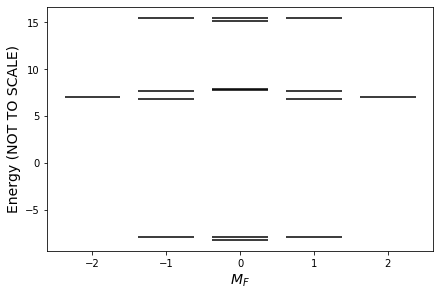

In [659]:
plot_levels_freefield(evals_ordered,evecs_ordered,qnumbers,label=False)

In [540]:
def write_state(vector,L,N,J,F,M):
    sum_sq = 0
    for index in np.nonzero(vector)[0]:
        _L = L[index]
        _N = N[index]
        _J = J[index]
        _F = F[index]
        _M = M[index]
        coeff = vector[index]
        print('case b): {} |\u039B={},N={},J={},F={},M={}> \n'.format(coeff,_L,_N,_J,_F,_M))
        sum_sq+=coeff**2
    print('Sum={} \n'.format(sum_sq))

In [588]:
for state in evecs_ordered:
    write_state(state,*qnumbers)

case b): -0.9783 |Λ=0,N=0,J=0.5,F=0.0,M=-0.0> 

case b): 0.2072 |Λ=0,N=0,J=0.5,F=1.0,M=0.0> 

Sum=1.0000027299999998 

case b): 1.0 |Λ=0,N=0,J=0.5,F=1.0,M=-1.0> 

Sum=1.0 

case b): 0.2072 |Λ=0,N=0,J=0.5,F=0.0,M=-0.0> 

case b): 0.9783 |Λ=0,N=0,J=0.5,F=1.0,M=0.0> 

Sum=1.0000027299999998 

case b): 1.0 |Λ=0,N=0,J=0.5,F=1.0,M=1.0> 

Sum=1.0 

case b): -0.0128 |Λ=0,N=1,J=0.5,F=1.0,M=-1.0> 

case b): 0.9973 |Λ=0,N=1,J=1.5,F=1.0,M=-1.0> 

case b): -0.0717 |Λ=0,N=1,J=1.5,F=2.0,M=-1.0> 

Sum=0.9999120199999999 

case b): 0.0052 |Λ=0,N=1,J=0.5,F=0.0,M=-0.0> 

case b): -0.0157 |Λ=0,N=1,J=0.5,F=1.0,M=0.0> 

case b): 0.9958 |Λ=0,N=1,J=1.5,F=1.0,M=0.0> 

case b): -0.09 |Λ=0,N=1,J=1.5,F=2.0,M=0.0> 

Sum=0.99999117 

case b): 0.0184 |Λ=0,N=1,J=0.5,F=1.0,M=1.0> 

case b): -0.9961 |Λ=0,N=1,J=1.5,F=1.0,M=1.0> 

case b): 0.0859 |Λ=0,N=1,J=1.5,F=2.0,M=1.0> 

Sum=0.99993258 

case b): 1.0 |Λ=0,N=1,J=1.5,F=2.0,M=-2.0> 

Sum=1.0 

case b): -0.0038 |Λ=0,N=1,J=0.5,F=1.0,M=-1.0> 

case b): -0.0709 |Λ=0,N=1,J=

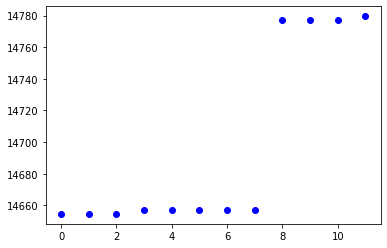

In [318]:
plt.plot(evals_ordered[4:],'bo')

In [206]:
x=np.array([[1,0,0,1],[0,1,1,1],[1,1,1,0]])
x.T

array([[1, 0, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [208]:
np.array([4,3,1,5,2]).argmax()

3

In [2]:
class MolecularState():
    def __init__(self,N=0,S=1/2,I=1/2):
        self.N=N
        self.mN = N
        self.S=S
        self.mS = S
        self.I=I
        self.mI = I
        self.p = (-1)**self.N
        
    def __repr__(self):
        attribs = [str(s) for s in [self.N,self.mN,self.S,self.mS,self.I,self.mI]]
        string = ','.join([str(s) for s in attribs])
        return "|" + string + "; " + "mF=" + str(self.mF()) + ">"
    
    def mF(self):
        return self.mN + self.mS + self.mI
    
    def F(self):
        return self.N + self.S + self.I
    
    def J(self):
        return self.N + self.S
    
    def mJ(self):
        return self.mN + self.mS
    
def sublevel_expand(basis):
    newbasis = []
    for ket in basis:
        for mN in np.arange(-ket.N,ket.N+1,1):
            for mS in np.arange(-ket.S,ket.S+1,1):
                for mI in np.arange(-ket.I,ket.I+1,1):
                    newket = deepcopy(ket)
                    newket.mN = mN
                    newket.mS = mS
                    newket.mI = mI
                    newbasis.append(newket)
    return newbasis


In [103]:
ground_basis = [MolecularState(N=i,I=1/2,S=1/2) for i in range(2)] # range(x) goes from 0,1,2,...,(x-1) 
ground_basis = sublevel_expand(ground_basis) # expande the basis to contain all the mN,mI,mS sublevels

In [104]:
ground_basis

[|0,0,0.5,-0.5,0.5,-0.5; mF=-1.0>,
 |0,0,0.5,-0.5,0.5,0.5; mF=0.0>,
 |0,0,0.5,0.5,0.5,-0.5; mF=0.0>,
 |0,0,0.5,0.5,0.5,0.5; mF=1.0>,
 |1,-1,0.5,-0.5,0.5,-0.5; mF=-2.0>,
 |1,-1,0.5,-0.5,0.5,0.5; mF=-1.0>,
 |1,-1,0.5,0.5,0.5,-0.5; mF=-1.0>,
 |1,-1,0.5,0.5,0.5,0.5; mF=0.0>,
 |1,0,0.5,-0.5,0.5,-0.5; mF=-1.0>,
 |1,0,0.5,-0.5,0.5,0.5; mF=0.0>,
 |1,0,0.5,0.5,0.5,-0.5; mF=0.0>,
 |1,0,0.5,0.5,0.5,0.5; mF=1.0>,
 |1,1,0.5,-0.5,0.5,-0.5; mF=0.0>,
 |1,1,0.5,-0.5,0.5,0.5; mF=1.0>,
 |1,1,0.5,0.5,0.5,-0.5; mF=1.0>,
 |1,1,0.5,0.5,0.5,0.5; mF=2.0>]

In [3]:
class MolecularState_bBS():
    def __init__(self,N=0,L=0,G=2,F=2,S=1/2,I=5/2):
        self.N=N
        self.G
        self.mN = N
        self.S=S
        self.mS = S
        self.I=I
        self.mI = I
        self.p = (-1)**self.N
        
    def __repr__(self):
        attribs = [str(s) for s in [self.N,self.mN,self.S,self.mS,self.I,self.mI]]
        string = ','.join([str(s) for s in attribs])
        return "|" + string + "; " + "mF=" + str(self.mF()) + ">"
    
    def mF(self):
        return self.mN + self.mS + self.mI
    
    def F(self):
        return self.N + self.S + self.I
    
    def J(self):
        return self.N + self.S
    
    def mJ(self):
        return self.mN + self.mS

In [172]:
x = 'a\nb'
print(x)

a
b


In [200]:
from functools import reduce

def expand_sublevels(qnumbers):
    F_vals = qnumbers['F']
    qnumbers_ex = {}
    for q in qnumbers:
        qnumbers_ex[q]=[]
    qnumbers_ex['mF'] = []
    for i,F in enumerate(F_vals):
        degen = int(2*F+1)
        for j in range(degen):
            mF=-F+j
            qnumbers_ex['mF'].append(mF)
        for q in qnumbers:
            qnumbers_ex[q].extend(np.full(degen,qnumbers[q][i]))
    for q in qnumbers_ex:
        qnumbers_ex[q] = np.array(qnumbers_ex[q])
    return qnumbers_ex

class QState:
    def __init__(self,basis,case_str,vector):
        self.basis = basis
        self.size = len(basis['M'])
        self.case = case_str
        self.vector = vector
        
    def __str__(self):
        nonzero = np.nonzero(self.vector)[0]
        total_str = 'Case {}\n'.format(self.case)
        for i,index in enumerate(nonzero):
            state = self.lookup_index(index)
            if i==0:
                state_str = '{} * |'.format(self.vector[index])
            else:
                state_str = ' + {} * |'.format(self.vector[index])
            for j,qnumber in enumerate(state):
                if j==0:
                    state_str+=str(qnumber)+'={}'.format(state[qnumber])
                else:
                    state_str+=', '+str(qnumber)+'={}'.format(state[qnumber])
            state_str+='>'
            total_str+=state_str
        return total_str
        
    @classmethod
    def Make_bBS(cls,N,S=1/2,I=5/2,L=0):
        basis = gen_bBS_basis(N,S=S,I=I,L=L)
        sublevel_basis = expand_sublevels(basis)
        dim = len(sublevel_basis['mF'])
        return cls(sublevel_basis,'bBS',np.zeros(dim))
    
    @classmethod
    def Make_aBJ(cls,N,S=1/2,I=5/2,L=0):
        basis = gen_aBJ_basis(N,S=S,I=I,L=L)
        sublevel_basis = expand_sublevels(basis)
        dim = len(sublevel_basis['mF'])
        return cls(sublevel_basis,'aBJ',np.zeros(dim))
    
    def lookup_index(self,index):
        state = {}
        for q in self.basis:
            state[q] = self.basis[q][index]
        return state
    
    def construct_pure_ket(self,F,mF,G_or_J):
        basis=self.basis
        if 'G' in basis:
            GJ = 'G'
        else:
            GJ = 'J'
        i1 = np.where(basis['mF']==mF)[0]
        i2 = np.where(basis['F']==F)[0]
        i3 = np.where(basis[GJ]==G_or_J)[0]
        vec = np.zeros(self.size)
        i=reduce(np.intersect1d, (i1,i2,i3))
        vec[i]=1
        return vec

    def construct_superpos(self,F_arr,mF_arr,G_or_J_arr,coeff):
        N = len(mF_arr)
        if coeff == []:
            coeff = np.full(N,1/np.sqrt(N))
        total_vec = np.zeros(self.size)
        for i,(F,mF,G_or_J) in enumerate(zip(F_arr,mF_arr,G_or_J_arr)):
            vec = self.construct_pure_ket(F,mF,G_or_J)
            total_vec+=vec*coeff[i]
        return total_vec

    def construct_arb_ket(self,F,mF,G_or_J,coeff=[]):
        if isinstance(F,float) or isinstance(F,int):
            _F = [F]
            _mF = [mF]
            _G_or_J = [G_or_J]
        else:
            _F = F
            _mF = mF
            _G_or_J = G_or_J
        self.vector = self.construct_superpos(_F,_mF,_G_or_J,coeff)
        return

In [207]:
myket = QState.Make_aBJ(1)
myket.construct_arb_ket(F=[2,3],mF=[2,3],G_or_J=[1.5,0.5])
myket.vector

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.70710678,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [208]:
print(myket)

Case aBJ
0.7071067811865475 * |S=0.5, N=1.0, J=0.5, I=2.5, F=3.0, mF=3.0> + 0.7071067811865475 * |S=0.5, N=1.0, J=1.5, I=2.5, F=2.0, mF=2.0>


In [46]:
from copy import deepcopy
import pprint

def _add_j(j1,j2):
    jmin = abs(j1-j2)
    jmax = j1+j2
    j_array = []
    j=jmin
    while jmin<=j<=jmax:
        j_array.append(j)
        j+=1
    return np.array(j_array)

def add_j(j1,j2):
    if (isinstance(j1,float) or isinstance(j1,int)) and (isinstance(j2,float) or isinstance(j2,int)):
        sum_j = _add_j(j1,j2)
        return sum_j
    else:
        sum_j=[]
        inter_j=[]
        if (isinstance(j1,float) or isinstance(j1,int)):
            j_arr = j2
            j_sing = j1
        elif (isinstance(j2,float) or isinstance(j2,int)):
            j_arr = j1
            j_sing = j2
        else:
            print('One of the angular momenta should not be an array')
            return []
        for _j in j_arr:
            _sum_j = _add_j(_j,j_sing)
            sum_j.extend(_sum_j)
            n = len(_sum_j)
            inter_j.extend(np.full(n,_j))
        return [np.array(sum_j),np.array(inter_j)]
    
def gen_bBS_basis(N,I=5/2,S=1/2,L=0):
    #(S,I)G,(G,N)F
    G=add_j(I,S)
    F_arr,G_arr = add_j(G,N)
    dim = len(F_arr)
    N_arr = np.full(dim,N)
    S_arr = np.full(dim,S)
    L_arr = np.full(dim,L)
    I_arr = np.full(dim,I)
    q_label = ['S','I','G','N','F']
    q_arr = np.array([S_arr,I_arr,G_arr,N_arr,F_arr])
    qnumbers = dict(zip(q_label,q_arr))
    return qnumbers

def gen_bBJ_Basis(N,I=1/2,S=1/2,L=0):
    J=add_j(N,S)
    F_arr,J_arr = add_j(J,I)
    dim = len(F_arr)
    N_arr = np.full(dim,N)
    S_arr = np.full(dim,S)
    L_arr = np.full(dim,L)
    I_arr = np.full(dim,I)
    q_label = ['S','N','J','I','F']
    q_arr = np.array([S_arr,N_arr,J_arr,I_arr,F_arr])
    qnumbers = dict(zip(q_label,q_arr))
    return qnumbers


def gen_aBJ_basis(N,I=5/2,S=1/2,L=0):
    J=add_j(N,S)
    F_arr,J_arr = add_j(J,I)
    dim = len(F_arr)
    N_arr = np.full(dim,N)
    S_arr = np.full(dim,S)
    L_arr = np.full(dim,L)
    I_arr = np.full(dim,I)
    q_label = ['S','N','J','I','F']
    q_arr = np.array([S_arr,N_arr,J_arr,I_arr,F_arr])
    qnumbers = dict(zip(q_label,q_arr))
    return qnumbers

def expand_sublevels(qnumbers):
    F_vals = qnumbers['F']
    qnumbers_ex = {}
    for q in qnumbers:
        qnumbers_ex[q]=[]
    qnumbers_ex['mF'] = []
    for i,F in enumerate(F_vals):
        degen = int(2*F+1)
        for j in range(degen):
            mF=-F+j
            qnumbers_ex['mF'].append(mF)
        for q in qnumbers:
            qnumbers_ex[q].extend(np.full(degen,qnumbers[q][i]))
    for q in qnumbers_ex:
        qnumbers_ex[q] = np.array(qnumbers_ex[q])
    return qnumbers_ex

def lookup_index(index,qnumbers):
    state = {}
    for q in qnumbers:
        state[q] = qnumbers[q][index]
    return state

def construct_pure_ket(basis,F,mF):
    _i=np.where(basis['mF']==mF)[0]
    i = np.where(basis['F'][_i]==F)
    dim = len(basis['mF'])
    vec = np.zeros(dim)
    vec[i]=1
    return vec

def construct_superpos(basis,F_arr,mF_arr,coeff):
    N = len(mF_arr)
    dim = len(basis['mF'])
    if coeff == []:
        coeff = np.full(N,1/np.sqrt(N))
    total_vec = np.zeros(dim)
    for i,F,mF in enumerate(zip(F_arr,mF_arr)):
        vec = construct_pure_ket(basis,F,mF)
        total_vec+=vec*coeff[i]
    return total_vec

def construct_arb_ket(basis,F,mF,coeff=[]):
    if isinstance(F,float) or isinstance(F,int):
        _F = [F]
        _mF = [mF]
    else:
        _F = F
        _mF = mF
    return construct_superpos(basis,_F,_mF,coeff)

In [122]:
test = qnumbers_bBS(1)
test2 = expand_sublevels(test)
pprint.pprint(test2)
lookup_index(0,test2)

{'F': array([1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 4.]),
 'G': array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3.]),
 'I': array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]),
 'N': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.]),
 'S': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'mF': array([-1.,  0.,  1., -2., -1.,  0.,  1.,  2., -3., -2.,

{'F': 1.0, 'G': 2.0, 'I': 2.5, 'N': 1.0, 'S': 0.5, 'mF': -1.0}

In [45]:
J = add_j(1,1/2)
F = add_j(J,1/2)
F

[array([0., 1., 1., 2.]), array([0.5, 0.5, 1.5, 1.5])]

In [50]:
gen_bBJ_Basis(3,I=1/2,S=1/2,L=0)

{'S': array([0.5, 0.5, 0.5, 0.5]),
 'N': array([3., 3., 3., 3.]),
 'J': array([2.5, 2.5, 3.5, 3.5]),
 'I': array([0.5, 0.5, 0.5, 0.5]),
 'F': array([2., 3., 3., 4.])}

In [132]:
i=np.where(test2['mF']==2)[0]
np.where(test2['F'][i]==4)

(array([4], dtype=int64),)

In [114]:
expand_sublevels(test)

{'F': array([1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4.,
        4., 4.]),
 'G': array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.]),
 'I': array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]),
 'N': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 'S': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'mF': array([-1.,  0.,  1., -2., -1.,  0.,  1.,  2.,

In [100]:
F=1.5
for i in range(int(2*F+1)):
    mF=-F+i
    print(mF)

-1.5
-0.5
0.5
1.5


In [89]:
class State:
    def __init__(self,N,G,F,I=5/2,S=1/2,L=0):
        self.F,self.G = qnumbers_bBS(N,I=I,S=S)
        self.N = np.full(len(self.F),N)
        self.I = np.full(len(self.F),I)
        self.S = np.full(len(self.F),S)
        self.L = np.full(len(self.F),L)
        

In [91]:
test = State_bBS(2)
test

In [84]:
print(determine_bBS(2))
print(determine_aBJ(2))

(array([0., 1., 2., 3., 4., 1., 2., 3., 4., 5.]), array([2., 2., 2., 2., 2., 3., 3., 3., 3., 3.]))
(array([1., 2., 3., 4., 0., 1., 2., 3., 4., 5.]), array([1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]))


In [13]:
j1 = np.array([2,3])
j2 = np.array([1])

In [26]:
add_j_many(5/2,1/2)

TypeError: zip argument #1 must support iteration

In [4]:
q = MolecularState(N=1,S=1/2,I=1/2)

In [6]:
q.N

1

In [31]:
j1=np.array([5])
print(j1 is list)

False


In [6]:
import csv

def read_CSV_columns(file_path,read_header=0,obj=False):
    '''Reads columns of data from CSV file. Returns [data,header]

    Inputs:
    file_path: location of file, referenced from parent directory
    read_header: number of lines to read as header instead of as data.
    Default is 0.
    obj: to typecast the read data as an object, set to True. Default is False.
    '''
    data_type = 'float'
    if obj:
        data_type='object'
    header = []
    with open(file_path,'r') as f:
        r = csv.reader(f)
        for i in range(read_header):
            header.append(next(r))
        rows = np.array([np.array([float(value) if isFloat(value) else value for value in row],dtype=data_type) for row in r])
    columns = rows.T
    print('Done! Array read from', file_path)
    return columns,header

def isFloat(value):
    '''Checks if input is float.'''
    # Probably easier to use isinstance
    try:
        float(value)
        return True
    except:
        return False

In [7]:
stuff = read_CSV_columns(r'C:\Users\arian\Dropbox (Hutzler Lab)\HutzlerLabShared\Personal\ArianJadbabaie\YbOH_X_Stark_E100kVcm.csv')

Done! Array read from C:\Users\arian\Dropbox (Hutzler Lab)\HutzlerLabShared\Personal\ArianJadbabaie\YbOH_X_Stark_E100kVcm.csv


In [8]:
XN = stuff[0][-1]
XJ = stuff[0][-2]
XM = stuff[0][-3]
XF = stuff[0][-4]

In [9]:
states = stuff[0][:-4]

In [10]:
states

array([[-0.64053735,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.64053547, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.00300731,  0.        , ...,  0.20891298,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.38506924, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.00394071,  0.        , ..., -0.40536122,
         0.        ,  0.        ],
       [ 0.        , -0.38503281,  0.        , ..., -0.00566412,
         0.        ,  0.        ]])

In [13]:
def write_state(vector,N,J,F,M):
    sum_sq = 0
    for index in np.nonzero(vector)[0]:
        _N = N[index]
        _J = J[index]
        _F = F[index]
        _M = M[index]
        coeff = vector[index]
        print('case b): {} |N={},J={},F={},M={}> \n'.format(coeff,_N,_J,_F,_M))
        sum_sq+=coeff**2
    print('Sum={}'.format(sum_sq))

In [14]:
write_state(states[0],XN,XJ,XF,XM)

case b): -0.6405373543982501 |N=0.0,J=0.5,F=0.0,M=0.0> 

case b): 0.3996420471226691 |N=1.0,J=0.5,F=1.0,M=0.0> 

case b): -0.5668016519982556 |N=1.0,J=1.5,F=1.0,M=0.0> 

case b): 0.2080070934019153 |N=2.0,J=1.5,F=2.0,M=0.0> 

case b): -0.2558653321156037 |N=2.0,J=2.5,F=2.0,M=0.0> 

Sum=1.0


In [57]:
def btoa_mat(Sig,O,L,N,J,F,M,S=0.5):
    return (-1)**(N-S+O)*np.sqrt(2*N+1)*wigner_3j(J,S,N,O,-Sig,-L)

def btoa(Lb,Nb,Jb,Fb,Mb):
    s=0.5
    s_min = -s
    sigma = s_min
    omega = s_min
    while sigma <= s:
        while omega <= s:
            print(omega,sigma)
            coeff = btoa_mat(sigma,omega,Lb,Nb,Jb,Fb,Mb,S=s)
            print('{} * |sigma={}, omega={}, J={},F={},M={}> \n'.format(coeff,sigma,omega,Jb,Fb,Mb))
            omega+=1
        omega=s_min
        sigma+=1

In [68]:
btoa(0,1,0.5,2,0)

-0.5 -0.5
0.288675134594813*sqrt(6) * |sigma=-0.5, omega=-0.5, J=0.5,F=2,M=0> 

0.5 -0.5
-0.0 * |sigma=-0.5, omega=0.5, J=0.5,F=2,M=0> 

-0.5 0.5
0.0 * |sigma=0.5, omega=-0.5, J=0.5,F=2,M=0> 

0.5 0.5
-0.288675134594813*sqrt(6) * |sigma=0.5, omega=0.5, J=0.5,F=2,M=0> 



In [66]:
wigner_3j(2.5,0.5,2,-0.5,0.5,0)*np.sqrt(2*2+1)

-0.223606797749979*sqrt(10)

In [3]:
import numpy as np
0.2236*np.sqrt(10)

0.7070852848136496

In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [7]:
session.evaluate(wlexpr('BeX = 7348.40053;\[Gamma]SRX = -81.150;b00X = 4.80;c00X = 2.46;'))

In [8]:
session.evaluate(wlexpr('\[Gamma]SRX'))

-81.15

In [20]:
complicated = wlexpr('f[x_]:=(x+5)(2x-3)')

In [12]:
session.evaluate(wlexpr('myfunc=(x+5)(2x-3);'))

In [28]:
simp = session.evaluate(wl.Simplify('f[x]'))

In [32]:
wl.Simplify('f[x]')

Simplify['f[x]']

In [29]:
simp

'f[x]'

In [25]:
complicated

(f[x_]:=(x+5)(2x-3))

In [3]:
for x in np.arange(abs(2-0),abs(2+0)+1,1):
    print(x)

2


In [2]:
import numpy as np

In [4]:
d = {'a': 1, 'b':2}

In [11]:
for k,v in d.items():
    print(k,v)
    if k=='a':
        d[k] = v+5

a 1
b 2


In [12]:
d.items()

dict_items([('a', 6), ('b', 2)])